# Credit Fraud Detection: Logistic Regression / SMOTE Oversampling

## Business Objective

Credit Fraud is a huge problem that we are all familiar with whether we have experienced it or not and a huge concern among consumers. There are huge uses cases for fraud detection algorithms as financial companies want to deliver the best service to their customers while reducing the costs and headaches associated with credit fraud on the backend. 
 This project seeks to develop a model that helps the financial industry predict whether a transaction is considered a fraud or not  based on anonymized transactional features. In addition, this problem brings an added challenge as it also involves the imbalanced class problem which is a common theme among machine learning research and literature. 

This is a supervised learning problem for Classification in which I will be utilizing a Logistic Regression Model and SMOTE Oversampling to predict fraudulent transactions. 

## Dataset Description/Project Motivations
##### Source- Kaggle
This dataset is titled Credit Card Fraud Detection and one of the most popular datasets on Kaggle. 
 * https://www.kaggle.com/mlg-ulb/creditcardfraud


"The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions."

I decided to undertake this project as I thought it would be interesting to be able to predict fraud with Machine Learning. I also wanted to further study oversampling and undersampling techniques like SMOTE with a practical example. 

## Evaluation Metric 
It is essential to define an evaluation metric or success criteria at the beginning of a Machine Learning project to guide performance. In this project, predictions will be evaluated by the Area Under the Precision-Recall Curve (AUPRC) and namely the Recall score which tells us how many frauds we were able to successfully detect. Accuracy is not the best metric as this is an imbalanced classification problem. 

$$ Recall = \frac{TP}{TP + FN} $$ 

### Import Packages/Data
First, I will import all the required packages required for this notebook and import the credit card data to the cc data frame. 

In [1]:
## Basic Data Processing 
import numpy as np 
import pandas as pd 

##Data Visualization 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## SMOTE Oversampling 
from imblearn.over_sampling import SMOTE

## SKLearn Packages 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hide Warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cc = pd.read_csv('creditcard.csv')

### Data Exploration
I will then explore the newly imported data to get a feel for its structure and data distributions. This can be easily accomplished with the describe(), head(), and info() functions from pandas. 

It looks like this dataset has 30 mostly anonymized features used to predict whether a transaction is fraud or not. 

In [3]:
round(cc.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [4]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

A quick plot with the hist function shows us how all the features are distributed. 

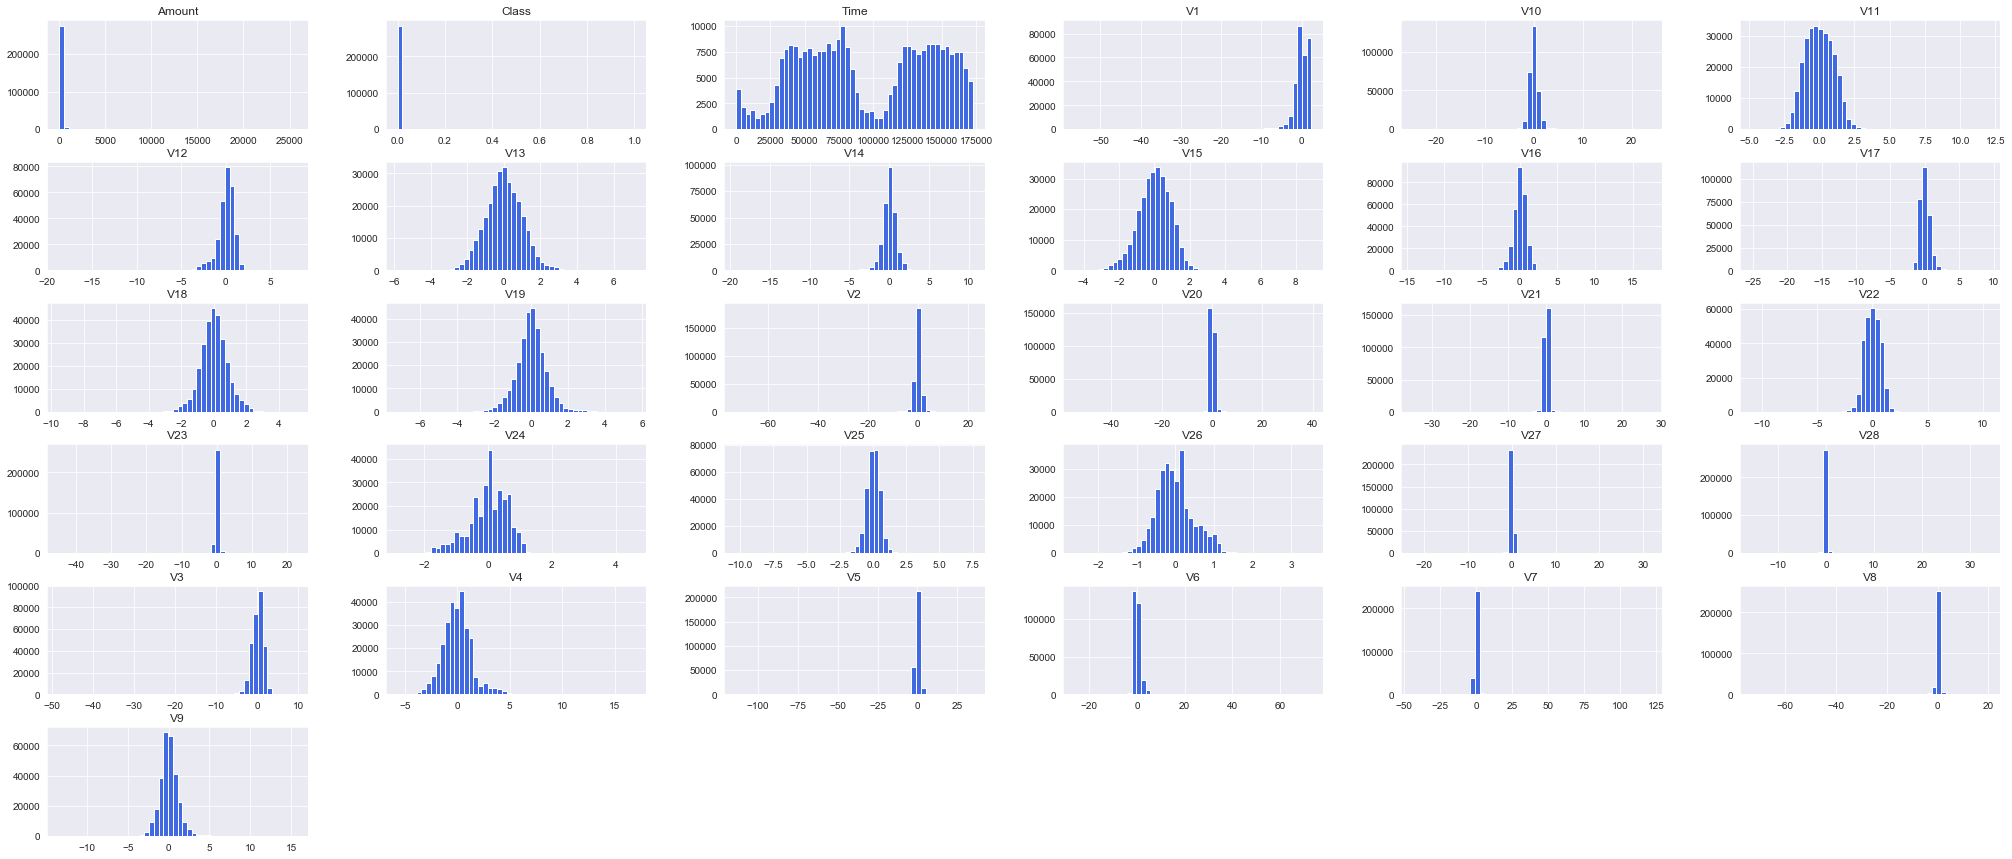

In [6]:
## Plot illustrates the distributions between all the features 
cc.hist(bins=50, figsize=(35,15), color = 'royalblue')
plt.show()

I also checked for nulls incase. Luckily this dataset is relatively clean and has no null values to fix.

In [7]:
## No nulls - no data cleaning needed 
cc.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

After looking at the dataset, it looks like the dataset has 284315 normal transactions and 492 Fraudulent Transactions which is around .00173 % of the dataset. This is truly an imbalanced classification problem! This means even if we achieve around .99827 accuracy it could still mean that we are missing all of the frauds completely.  

In [8]:
##Distribution of Transactions 
normal= len(cc[cc["Class"]==0])
fraud= len(cc[cc["Class"]==1])

print('There are',normal, 'Normal Transactions and',fraud,'Fraudulent Transactions.')
print(round(fraud/(normal+fraud),5), 'transactions are fraudulent.')
print('Baseline Accuracy:' , round(normal/(normal+fraud),5),'%')

There are 284315 Normal Transactions and 492 Fraudulent Transactions.
0.00173 transactions are fraudulent.
Baseline Accuracy: 0.99827 %


### Split Training/Test Data 
It is important to first split the training and test sets to prevent any data leakage. I will be splitting the train/test set 80/20 in this project which is pretty typical in most ML projects. The train set will then be used to train the model while the test set will be used for our final hold out set to evaluate fraud detection ability on unseen data. 

In [9]:
train_set, test_set = train_test_split(cc, test_size = 0.2,random_state = 42, stratify=cc['Class'])

### Feature Exploration/Selection 
In this section, I will explore the features and also remove some features where the distributions are very similar among both classes.

First, I will explore the Time and Amount features as they are the 2 un-anonymized features in the dataset. 

Nothing looks out of the ordinary for the distributions for Time and Amount for Fraud and Normal Transactions. 

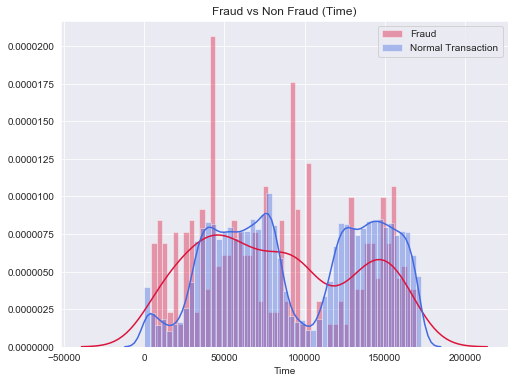

In [10]:
plt.subplots(figsize=(8, 6))
plt.title('Fraud vs Non Fraud (Time)')
graph1 = sns.distplot(train_set.Time[train_set.Class == 1],bins=50, color='crimson', label='Fraud')
graph2 = sns.distplot(train_set.Time[train_set.Class == 0],bins=50, color='royalblue',label='Normal Transaction')
plt.legend()

In [11]:
train_set['Amount'] = np.log1p(train_set['Amount'])
test_set['Amount'] = np.log1p(test_set['Amount'])

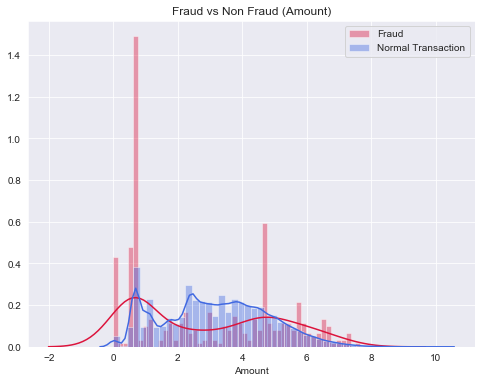

In [12]:
plt.subplots(figsize=(8, 6))
plt.title('Fraud vs Non Fraud (Amount)')
graph1 = sns.distplot(train_set.Amount[train_set.Class == 1],bins=50, kde=True, color='crimson', label='Fraud')
graph2 = sns.distplot(train_set.Amount[train_set.Class == 0],bins=50, kde=True, color='royalblue',label = 'Normal Transaction')
plt.legend()

### Feature Distributions
In the next section, I will visualize all of the anonymized feature distributions of the training set between Fraud and Non-Fraudulent transactions. I will then remove the features that have very similar distributions between both classes to help improve the model's predictive performance. 

In [13]:
#Select only the anonymized features.
cc_features = train_set.ix[:,1:29].columns

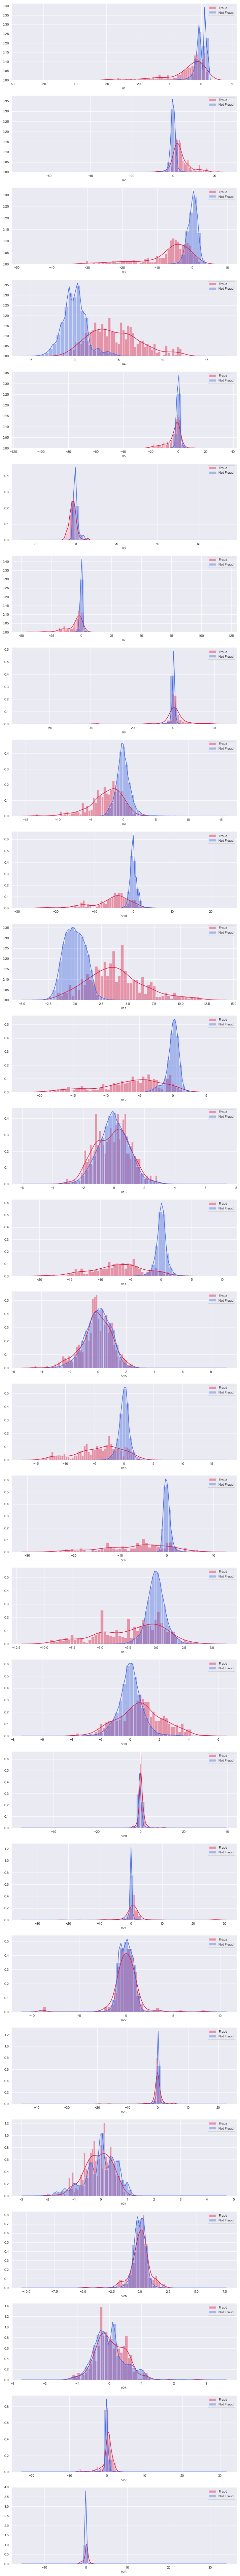

In [14]:
legend= ['Fraud','Not Fraud']
plt.figure(figsize=(12,28*5))
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(cc[cc_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 1],bins=50, color='crimson')
    sns.distplot(cc[col][cc.Class == 0],bins=50, color='royalblue')
    plt.legend(legend)

We can also look at the correlations to help guide our feature selection decision. 

In [15]:
train_set.corr()['Class'].sort_values()

V17      -0.321937
V14      -0.301054
V12      -0.259989
V10      -0.217894
V3       -0.194135
V16      -0.193826
V7       -0.186184
V18      -0.108732
V1       -0.100041
V9       -0.098247
V5       -0.093578
V6       -0.043334
Time     -0.010564
Amount   -0.008141
V24      -0.007483
V13      -0.005861
V15      -0.005705
V23      -0.004169
V25       0.001618
V22       0.002926
V26       0.004119
V28       0.009810
V27       0.016034
V20       0.019385
V8        0.020552
V19       0.032380
V21       0.035588
V2        0.090586
V4        0.135014
V11       0.153709
Class     1.000000
Name: Class, dtype: float64

I decided to remove the below features based on similarity in their data distributions between the fraud and normal transactions. This feature removal is also performed on the test set as both datasets need to be identical in structure. 

In [16]:
## Drop Anonymized Features with similar distributions 
train_set = train_set.drop(['V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','Time','Amount','V26','V27','V28'], axis=1)
test_set = test_set.drop(['V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','Time','Amount','V26','V27','V28'], axis=1)

In [17]:
train_set.corr()['Class'].sort_values()

V17     -0.321937
V14     -0.301054
V12     -0.259989
V10     -0.217894
V3      -0.194135
V16     -0.193826
V7      -0.186184
V18     -0.108732
V1      -0.100041
V9      -0.098247
V5      -0.093578
V2       0.090586
V4       0.135014
V11      0.153709
Class    1.000000
Name: Class, dtype: float64

Performing the head function again shows our data is good to go. 

In [18]:
train_set.head()

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,-1.479661,1.406819,-0.157403,-0.113729,0.510277,-0.066555,0.352514,-0.765670,0.141938,0
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,-0.002192,0.045826,0.284864,-0.254903,0.325560,0.721068,-0.754029,-0.270842,-0.695698,0
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,-2.212603,0.000772,-2.009561,-0.386845,1.820161,0.122746,1.123344,-0.724616,0.147255,0
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-1.427984,-1.118447,1.756121,0.093136,-0.722450,-0.195288,-0.065888,0.072781,0.768237,0
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,0.504347,-0.044782,-0.558955,-0.251076,-0.054708,0.134659,-2.096099,-0.399525,1.597589,0


Now, lets separate the X (predictive features) and y (target values) in the training and test set. This is important as an input to our Logistic Regression model. 

In [19]:
X_train = train_set.drop('Class',axis=1)
y_train = train_set['Class'].copy()

X_test = test_set.drop('Class',axis=1)
y_test = test_set['Class'].copy()

## Logistic Regression 
Its time for the funnest part of any Machine Learning project where we begin model building. I will first try a Logistic Regression out of the box to get a baseline on performance before performing SMOTE oversampling/ Feature Engineering.

It is relatively easy to do thanks to a software library called sklearn which has many of the common machine learning algorithms available for model deployment. Creating a logistic regression model is as simple as assigning LogisticRegression() to a variable.

We can then "fit" this model to our data by using the variable's fit function and specifying the X (features), and y (target) data of the training dataset.

In [20]:
# Fitting Logistic Regression to the Training set
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now that the model has been fit the predict_proba function gives us the probability that a transaction in the training set is fraudulent. Lets discuss what I call thresholding and how one can modify a model's performance through the use of probabilities. 

The predict_proba() function allows us to predict the probability that an observation belongs to class 1. In this case, if the function returned .15 it would mean that there is a 15 % chance that the current observation is a fraudulent transaction based on our trained logistic regression model. We could then set a threshold for what we will classify to be class 1 (fraud). Instead of a .5 threshold (predict function) we could say that anything with over .3 probability of being fraud should be classified as fraud. This allows greater customization of our model and would be especially useful if we really wanted to reduce our risk missing a fraud. 

In [21]:
y_predlog = LR.predict_proba(X_train)

I can then plot the various thresholds with the below function to see how the precision and recall curves look for each probability threshold. 

Some people ask what is the difference between Precision and Recall. Usually in Machine Learning our goal is to optimize one metric so our model will often need to choose one main metric when working on Machine Learning problems. There is a fundamental tradeoff between Precision and Recall Scores. This means that as either Precision or Recall rises the other will usually decrease. It is important to keep this in mind when deciding which metrics to use. There are also some cases where you would prefer a higher Precision or higher Recall. In this case, I believe recall would be preferred as it tells us how many frauds we catch but we should also ensure that we are not flagging too many normal transactions as this may be annoying for customers. 

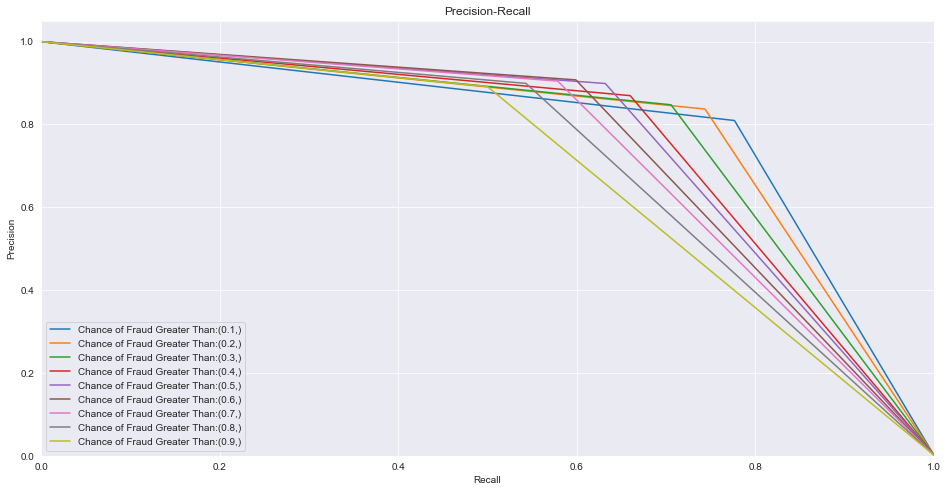

In [22]:
plt.figure(figsize=(16,8))
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_test_predictions_prob = y_predlog[:,1] > i
    precision, recall, thresholds = precision_recall_curve(y_train,y_test_predictions_prob)
    # Plot Precision-Recall curve
    Label = 'Chance of Fraud Greater Than:' + str(i) 
    plt.plot(recall, precision, label=Label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left")   

The below function also prints the Recall Score, Precision Score, Average Precision Score, and Confusion Matrix for each probability threshold. This will be useful in the future when we need to evaluate our other models at various settings.

In [23]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions = y_predlog[:,1] > i
    cnf_matrix = confusion_matrix(y_train,y_train_predictions)
    np.set_printoptions(precision=2)
    print('Threshold:', i)
    print('Recall Score:',recall_score(y_train, y_train_predictions))
    print('Precision Score:', precision_score(y_train, y_train_predictions))
    print('AVG Precision Score:', average_precision_score(y_train, y_train_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Recall Score: 0.7766497461928934
Precision Score: 0.8095238095238095
AVG Precision Score: 0.6291026886829783
[[227379     72]
 [    88    306]]
-------------------------
Threshold: (0.2,)
Recall Score: 0.7436548223350253
Precision Score: 0.8371428571428572
AVG Precision Score: 0.6229886065089699
[[227394     57]
 [   101    293]]
-------------------------
Threshold: (0.3,)
Recall Score: 0.7055837563451777
Precision Score: 0.8475609756097561
AVG Precision Score: 0.5985343749430886
[[227401     50]
 [   116    278]]
-------------------------
Threshold: (0.4,)
Recall Score: 0.6598984771573604
Precision Score: 0.8695652173913043
AVG Precision Score: 0.5744128818615964
[[227412     39]
 [   134    260]]
-------------------------
Threshold: (0.5,)
Recall Score: 0.631979695431472
Precision Score: 0.8989169675090253
AVG Precision Score: 0.5687336688955029
[[227423     28]
 [   145    249]]
-------------------------
Threshold: (0.6,)
Recall Score: 0.5989847715736041
Precision 

Logistic Regression is also a highly interpretable model in terms of Machine Learning. Lets interpret the model quickly to also gain some feature ideas. We can see that the most important features that contribute to fraud are definitely the anonymized V4, V5, and V7 while the rest of the features more or less contribute around the same impact. Lets use this knowledge to create interaction features to help find frauds easier. 

In [24]:
interpret = pd.DataFrame(np.exp(LR.coef_).reshape(-1,1),X_train.columns)
interpret = interpret.rename(columns={0:'Logit'})
fraudfactors = interpret.sort_values(by='Logit', ascending=False)[0:10]
fraudfactors

,Logit
V4,1.843486
V5,1.181538
V7,1.106318
V2,1.050940
V18,1.044466
V11,1.043222
V3,1.021835
V9,1.018740
V12,1.018047
V1,1.007425


## Feature Engineering
Logistic Regression cannot detect interactions between features so it is important to create features that can represent interactions for the model. 

In [25]:
## Create Interactions for Train and Test Set 
X_train['V4_V5_int'] = X_train['V4'] * X_train['V5']
X_train['V4_V7_int'] = X_train['V4'] * X_train['V7']
X_train['V4_V2_int'] = X_train['V4'] * X_train['V2']
X_train['V5_V7_int'] = X_train['V5'] * X_train['V7']
X_train['V5_V2_int'] = X_train['V5'] * X_train['V2']

X_test['V4_V5_int'] = X_test['V4'] * X_test['V5']
X_test['V4_V7_int'] = X_test['V4'] * X_test['V7']
X_test['V4_V2_int'] = X_test['V4'] * X_test['V2']
X_test['V5_V7_int'] = X_test['V5'] * X_test['V7']
X_test['V5_V2_int'] = X_test['V5'] * X_test['V2']

## SMOTE Oversampling 
Now that we have some baseline scores. Lets see if we can improve these scores on the training set with SMOTE Oversampling. 

The original SMOTE Oversampling paper can be found at this link: 
* https://arxiv.org/pdf/1106.1813.pdf

Standard Machine Learning Algorithms can become overwhelmed by the majority class negatively impacting their ability to generalize in class imbalance problems.

There are however four main methods for dealing with class imbalance depending on what phase of learning: 
* Changing Class Distributions 
* Feature Selection 
* Modifications within the Classifier itself
* Ensemble Learning Methods

SMOTE is a method that falls within the Changing Class Distributions category which means changing the nature of the data distribution by removing or creation of synthetic examples. 

SMOTE generates synthetic examples to over-sample the minority class, by generating instead of replicating data to avoid the overfitting problem.

Lets use SMOTE to create synthetic examples than train the model on the new data.  

In [26]:
sm = SMOTE(random_state=42)
X_train_os, y_train_os = sm.fit_sample(X_train, y_train)

In [27]:
# Fitting Logistic Regression to the Training set
LRos = LogisticRegression()
LRos.fit(X_train_os, y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Like previously we can get our models probability's of fraud by using the predict_proba function.

In [28]:
y_predlogos = LRos.predict_proba(X_train)

After plotting the thresholds again we can clearly see that recall scores (ability to detect frauds) has improved. Now almost every probability threshold setting gets us around 90 % detection of frauds which is an excellent improvement. 

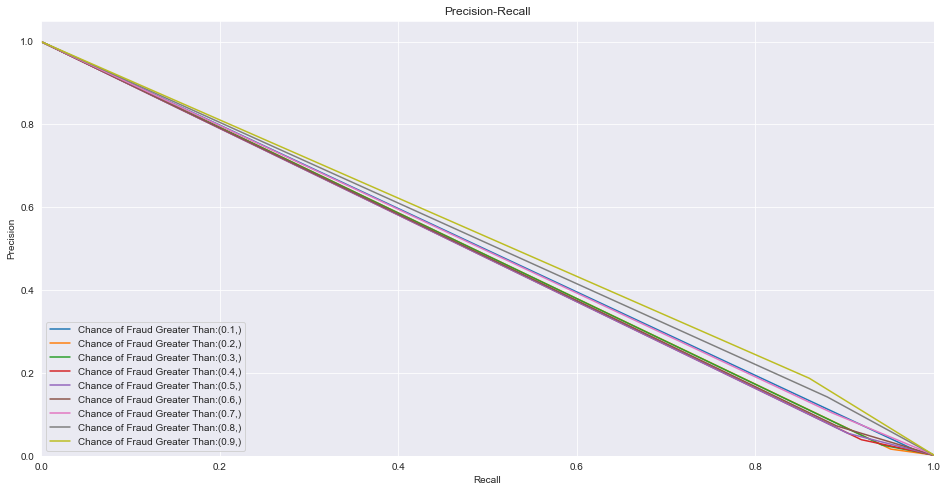

In [29]:
plt.figure(figsize=(16,8))
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions_prob = y_predlogos[:,1] > i
    precision, recall, thresholds = precision_recall_curve(y_train,y_train_predictions_prob)
    # Plot Precision-Recall curve
    Label = 'Chance of Fraud Greater Than:' + str(i) 
    plt.plot(recall, precision, label=Label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left") 

In [30]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions = y_predlogos[:,1] > i
    cnf_matrix = confusion_matrix(y_train,y_train_predictions)
    np.set_printoptions(precision=2)
    print('Threshold:', i)
    print('Recall Score:',recall_score(y_train, y_train_predictions))
    print('Precision Score:', precision_score(y_train, y_train_predictions))
    print('AVG Precision Score:', average_precision_score(y_train, y_train_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Recall Score: 0.9847715736040609
Precision Score: 0.008027475483096786
AVG Precision Score: 0.007931563355321377
[[179505  47946]
 [     6    388]]
-------------------------
Threshold: (0.2,)
Recall Score: 0.9517766497461929
Precision Score: 0.016121404926701347
AVG Precision Score: 0.015427366794257347
[[204565  22886]
 [    19    375]]
-------------------------
Threshold: (0.3,)
Recall Score: 0.9416243654822335
Precision Score: 0.02620796835264199
AVG Precision Score: 0.024779007389064165
[[213666  13785]
 [    23    371]]
-------------------------
Threshold: (0.4,)
Recall Score: 0.9187817258883249
Precision Score: 0.0388787455697562
AVG Precision Score: 0.03586152731102907
[[218502   8949]
 [    32    362]]
-------------------------
Threshold: (0.5,)
Recall Score: 0.9035532994923858
Precision Score: 0.05427656654977893
AVG Precision Score: 0.04920855083901036
[[221248   6203]
 [    38    356]]
-------------------------
Threshold: (0.6,)
Recall Score: 0.890862944162

## Hyperparameter Tuning 
This next section will attempt to tune our Logistic Regression model for optimal performance. Hyperparameter tuning is an important part of Machine Learning that I would equate to turning the knobs on an ML model to get the optimal settings. I'm hoping that through GridSearch (Exhaustive Search) I can find the optimal parameters for this Logistic Regression model and improve the recall score further. Grid Search is the simplest and most computationally expensive method but since this dataset is small it is ok to use in this case. 

In [31]:
# Create the random grid
param_grid = [
  {'C': [.001,.01,.1,1, 10, 100, 1000], 'penalty':['l1', 'l2']}]
grid_searchlog = GridSearchCV(LRos, param_grid, cv=5, 
                           scoring='average_precision')

Looks like our optimal model has the below parameter values for C and regularization penalty. 

In [32]:
grid_searchlog.fit(X_train_os,y_train_os)
grid_searchlog.best_params_

{'C': 1, 'penalty': 'l1'}

We can then create a new model that utilizes these best parameters and re-generate predictions. 

In [33]:
optimised_log_reg = grid_searchlog.best_estimator_
optimised_log_reg

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_predlogopt = optimised_log_reg.predict_proba(X_train)

Fraud Probability Thresholds for the training set and optimised model are printed again below. Based on training set performance lets select the threshold of .8 for our final model as this maintains a good balance between fraud detection and not misclassifying too many normal transactions. 

In [35]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions = y_predlogopt[:,1] > i
    cnf_matrix = confusion_matrix(y_train,y_train_predictions)
    np.set_printoptions(precision=2)
    print('Threshold:', i)
    print('Accuracy:',accuracy_score(y_train, y_train_predictions))
    print('Recall Score:',recall_score(y_train, y_train_predictions))
    print('Precision Score:', precision_score(y_train, y_train_predictions))
    print('AVG Precision Score:', average_precision_score(y_train, y_train_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Accuracy: 0.7881235050143738
Recall Score: 0.9847715736040609
Precision Score: 0.00797418665351337
AVG Precision Score: 0.007879086030756998
[[179182  48269]
 [     6    388]]
-------------------------
Threshold: (0.2,)
Accuracy: 0.8989883473413943
Recall Score: 0.9543147208121827
Precision Score: 0.016086937919822016
AVG Precision Score: 0.015431002744970276
[[204454  22997]
 [    18    376]]
-------------------------
Threshold: (0.3,)
Accuracy: 0.9391955057166056
Recall Score: 0.9416243654822335
Precision Score: 0.026123081256161106
AVG Precision Score: 0.024699075630702724
[[213620  13831]
 [    23    371]]
-------------------------
Threshold: (0.4,)
Accuracy: 0.9603809607408546
Recall Score: 0.9187817258883249
Precision Score: 0.03868761355135193
AVG Precision Score: 0.035685918705287076
[[218456   8995]
 [    32    362]]
-------------------------
Threshold: (0.5,)
Accuracy: 0.9725778489762777
Recall Score: 0.9035532994923858
Precision Score: 0.05421870240633567
A

## Test Set Evaluation
Now that we have our final model, lets see how our model performs on unseen test data. 

In [36]:
y_predtestlog = optimised_log_reg.predict_proba(X_test)

In [37]:
## If Chance of fraud is greater than 30 % then classify as Fraud 
y_test_predictions = y_predtestlog[:,1] >= .8
cnf_matrix2 = confusion_matrix(y_test,y_test_predictions)
print('Accuracy:',accuracy_score(y_test, y_test_predictions))
print('Recall',recall_score(y_test, y_test_predictions))
print('Precision',precision_score(y_test, y_test_predictions))
print('AUPRC', average_precision_score(y_test, y_test_predictions))
cnf_matrix2

Accuracy: 0.9897826621256276
Recall 0.9183673469387755
Precision 0.1355421686746988
AUPRC 0.12461794635097535


array([[56290,   574],
       [    8,    90]])

We can also view the interpretation of the most important factors again. Our most important factors were feature V4, V11, V7, and V18. 

In [38]:
## Model Interpretation 
interpret = pd.DataFrame(np.exp(optimised_log_reg.coef_).reshape(-1,1),X_train.columns)
interpret = interpret.rename(columns={0:'Logit'})
fraudfactors = interpret.sort_values(by='Logit', ascending=False)[0:10]
fraudfactors

,Logit
V4,2.648134
V11,1.303458
V7,1.245893
V18,1.217390
V5,1.137492
V4_V2_int,1.106600
V4_V5_int,1.106066
V9,1.050751
V4_V7_int,1.010121
V5_V2_int,1.004150


#### With a Logistic Regression Model that classifies any transaction with over 30 % chance of Fraud as Fraudulent we only missed 7/98 Frauds. 

* 91.8 Recall (Able to predict 91.8 % of frauds) 

Lets now compare this to the original model and see what difference we get. It seems with a threshold of 80 % chance of being fraud, our OverSampling Model received a recall score of 91.8 % (Fraud Detection) and our original baseline could only detect 64.2 %. Great improvement through SMOTE oversampling. 

As we can see with our new model the precision scores dropped a bit with oversampling but our Recall scores are much better. There is a tradeoff between how high we set the threshold and our precision/recall scores. This illustrates one of the many tradeoffs that exist in Machine Learning modeling. 

For Example- If we look at this from two different probability thresholds : 
* Threshold 1- Classify all transactions with 10 % or more chance of being fraud as fraud 
 * 96.9 % Fraud Detection 
 * 12903 Misclassified Normal Transaction 
 
This would get nearly all the frauds but be potentially frustrating for customers as many normal transactions will get flagged as fraud. 

* Threshold 2- Classify all transactions with 50 % chance or more of being fraud as fraud 
 * 91.8 % Fraud Detection 
 * 1592 Misclassified Normal Transaction 
 
Around 8.2 % of frauds would be missed but alot less normal transactions would be missclassified.  

Although each Threshold is different it is important to have a high recall score and also find a balance that does not misclassify to many normal transactions. Another way to evaluate would be to assign a cost to frauds and misclassified normal transactions to determine which model is best. 

In [39]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_test_predictions = y_predtestlog[:,1] > i
    cnf_matrix = confusion_matrix(y_test,y_test_predictions)
    print('Threshold:', i)
    print('Accuracy:',accuracy_score(y_test, y_test_predictions))
    print('Recall Score:',recall_score(y_test,y_test_predictions))
    print('Precision Score:', precision_score(y_test,y_test_predictions))
    print('AVG Precision Score:', average_precision_score(y_test,y_test_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Accuracy: 0.7878761279449458
Recall Score: 0.9489795918367347
Precision Score: 0.007641114123736751
AVG Precision Score: 0.007339039179111752
[[44786 12078]
 [    5    93]]
-------------------------
Threshold: (0.2,)
Accuracy: 0.8981426213967206
Recall Score: 0.9387755102040817
Precision Score: 0.015625
AVG Precision Score: 0.014773700727086945
[[51068  5796]
 [    6    92]]
-------------------------
Threshold: (0.3,)
Accuracy: 0.9381517502896668
Recall Score: 0.9285714285714286
Precision Score: 0.02522872192958137
AVG Precision Score: 0.023549559306688898
[[53348  3516]
 [    7    91]]
-------------------------
Threshold: (0.4,)
Accuracy: 0.9600259822337699
Recall Score: 0.9183673469387755
Precision Score: 0.03815175922000848
AVG Precision Score: 0.03517777440279038
[[54595  2269]
 [    8    90]]
-------------------------
Threshold: (0.5,)
Accuracy: 0.9718233208103648
Recall Score: 0.9183673469387755
Precision Score: 0.053349140486069944
AVG Precision Score: 0.049134

### Conclusion

This was an interesting exercise in Fraud Detection with Logistic Regression and SMOTE oversampling.

Some key benefits to using Logistic Regression from a business perspective include: 
* Simple Interpretation - Many companies use Logistic Regression still for classification as it can be easily explained. Sometimes explainability is more important than model performance.
* Probabilistic Approach- Since Logistic Regression returns a probability you can see how significant a prediction is.

I look forward to possibly using this dataset with other Machine Learning models to see if I can get even better predictive performance. 91.8 % Fraud Detection is pretty good considering how challenging Frauds are to detect in real life and would likely be of value to any financial institution.